In [80]:
#importa las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from src import soporte_limpieza as sl
from src import soporte_eda as se

In [81]:
#configura para poder visualizar todas las columnas del dataframe
pd.set_option("display.max_columns", None)

In [82]:
#lee el pickle que contiene el df final 
df = pd.read_pickle("datos/datos-final-mejorado.pkl")
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013


Análisis de ingresos recaudados

Para empezar, quiero conocer el total de ingresos recaudados entre 2013 y 2021

In [83]:
#calcula el total de los ingresos para todos los años
total_ingresos = df["Valor_realizado"].sum()
total_ingresos

np.float64(25637382435446.004)

De 2013 a 2021 el gobierno de Brasil recaudó 25.637.382.435.446 BRL

Voy a observar ahora año a año como fue esta recaudación para poder detectar diferencias en la recaudación entre periodos anuales. Lo primero que voy a hacer es creaar un dataframe donde voy a tener los años agrupados y para cada año voy a tener por un lado los ingresos totales recaudados en ese año, y por otro lado, el % de esos ingresos sobre el total de la recaudación para todos los años. Con % considero que se ve mejor

In [84]:
#genera el dataframe para la primera visualizacion (recaudacion de ingresos año a año)
df_ingresos_año = df.groupby("Ano_exercício")["Valor_realizado"].sum()
df_ingresos_año = df_ingresos_año.reset_index()
df_ingresos_año["%/Total"] = round((df_ingresos_año["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_año

,Ano_exercício,Valor_realizado,%/Total
0,2013,1.893614e+12,7.39
1,2014,2.238551e+12,8.73
2,2015,2.665685e+12,10.40
3,2016,2.839712e+12,11.08
4,2017,2.558047e+12,9.98
5,2018,2.942388e+12,11.48
6,2019,2.991565e+12,11.67
7,2020,3.631449e+12,14.16
8,2021,3.876372e+12,15.12


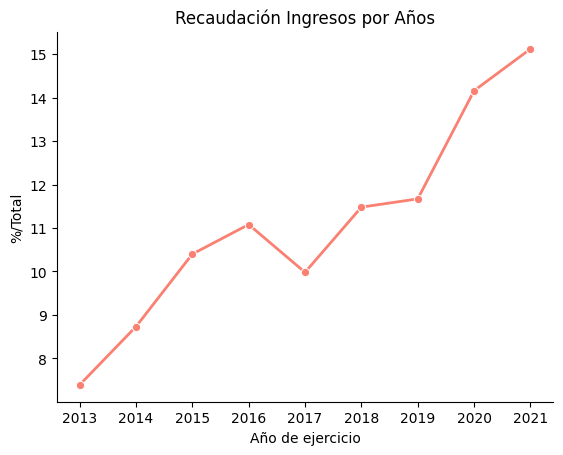

In [85]:
#genera la primera visualizacion (recaudacion ingresos año a año)
sns.lineplot(x = df_ingresos_año["Ano_exercício"],
              y = df_ingresos_año["%/Total"], 
               marker = "o", 
                linewidth = 2, 
                color="salmon", 
                errorbar = None)

plt.title("Recaudación Ingresos por Años")
plt.xlabel("Año de ejercicio")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Parece que la recaudación de los ingresos siguen de forma general una tendencia alcista con el paso de los años entre 2013 y 2021. De 2013 a 2016 la recaudación en los ingresos aumenta año a año. Se pasa de un 7,39% sobre la recaudación total en 2013 a un 11,08% en 2016. Sin embargo, en 2017, es el único año donde se observa un descenso en la recaudación, pues el % sobre la recaudación total cae a un 9,98%. A partir de este año y hasta 2021, los ingresos continúan aumentando hasta obtener en 2021 un % de 15,12%. En total, con los años, el aumento en el porcentaje ha sido de un 8% aprox

Una vez observado como han evolucionado los ingresos recaudados por el gobierno de Brasil a lo largo de los años, me gustaría observarlo también a lo largo de los meses (de forma general, para todos los años). Voy a generar un dataframe igual que el de los años, pero esta vez agrupando por mes. Para ello, lo primero que necesito es disponer de una columna en mi dataframe original donde disponga de únicamente el mes, ya que en la columna de fecha de registro dispongo del día, mes, y año

In [86]:
#crea la columna de mes_registro 
df["Mes_registro"] = df["Data_lançamento"].dt.month
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013,12.0
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12.0
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013,12.0
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013,12.0
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013,12.0


In [87]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes)
df_ingresos_mes = df.groupby("Mes_registro")["Valor_realizado"].sum()
df_ingresos_mes = df_ingresos_mes.reset_index()
df_ingresos_mes["%/Total"] = round((df_ingresos_mes["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_mes

,Mes_registro,Valor_realizado,%/Total
0,1.0,1.933736e+12,7.54
1,2.0,1.195699e+12,4.66
2,3.0,1.666703e+12,6.50
3,4.0,1.591285e+12,6.21
4,5.0,1.282092e+12,5.00
5,6.0,1.259372e+12,4.91
6,7.0,1.683137e+12,6.57
7,8.0,1.700054e+12,6.63
8,9.0,1.890279e+12,7.37
9,10.0,1.734954e+12,6.77


In [88]:
#saca los valores unicos de la columna Mes_registro
df_ingresos_mes["Mes_registro"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

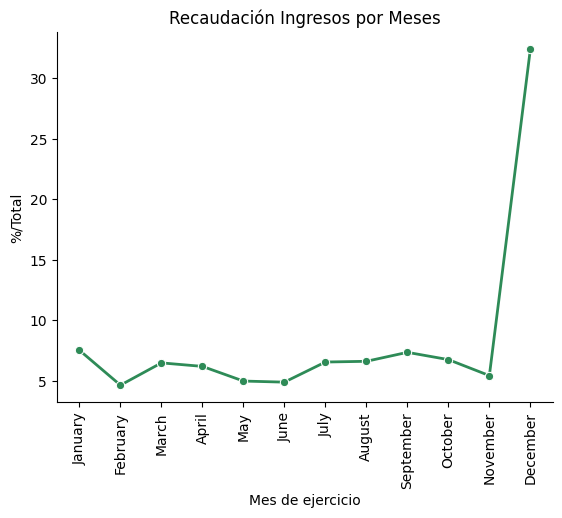

In [89]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes)
sns.lineplot(x = df_ingresos_mes["Mes_registro"],
              y = df_ingresos_mes["%/Total"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

En este gráfico se observa algo que ya venía esperando, pues he de recordar que en el análisis exploratorio ya había observado que algo raro ocurría con la fecha de registro en los 3 primeros años, pues esta era siempre la misma (31 de diciembre). Es por ello por lo que parece de primeras que diciembre es el mes en el que más se recauda con diferencia, pero en realidad esto no es así. Voy a hacer el gráfico de nuevas omitiendo los años de 2013, 2014 y 2015, de forma que os datos ya sean más realistas

In [91]:
#crea un dataframe a partir del original con todos los años excepto el 2013, 2014 y 2015
df_sin_tres_primeros_años = df[(df["Ano_exercício"] != 2013) & (df["Ano_exercício"] != 2014) & (df["Ano_exercício"] != 2015)]
df_sin_tres_primeros_años.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
13574,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Encargos legais pela inscr.em div.ativa-princ,0.0,0.0,154948.98,0.0,2016-04-04,2016,4.0
13575,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,80.84,0.0,2016-12-08,2016,12.0
13576,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Outras receitas-primarias-principal,0.0,0.0,4996.11,0.0,2016-08-22,2016,8.0
13577,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Taxas,Taxa de controle e fisc.ambiental-mul.jur.,0.0,0.0,0.77,0.0,2016-03-21,2016,3.0
13578,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,23.45,0.0,2016-11-04,2016,11.0


In [94]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes) sin los 3 primeros años
df_ingresos_mes_correcto = df_sin_tres_primeros_años.groupby("Mes_registro")["Valor_realizado"].sum()
df_ingresos_mes_correcto = df_ingresos_mes_correcto.reset_index()
df_ingresos_mes_correcto["%/Total"] = round((df_ingresos_mes_correcto["Valor_realizado"] / df_sin_tres_primeros_años["Valor_realizado"].sum())*100,2)
df_ingresos_mes_correcto

,Mes_registro,Valor_realizado,%/Total
0,1.0,1.933736e+12,10.26
1,2.0,1.195699e+12,6.35
2,3.0,1.666703e+12,8.85
3,4.0,1.591285e+12,8.45
4,5.0,1.282092e+12,6.81
5,6.0,1.259372e+12,6.68
6,7.0,1.683137e+12,8.93
7,8.0,1.700054e+12,9.02
8,9.0,1.890279e+12,10.03
9,10.0,1.734954e+12,9.21


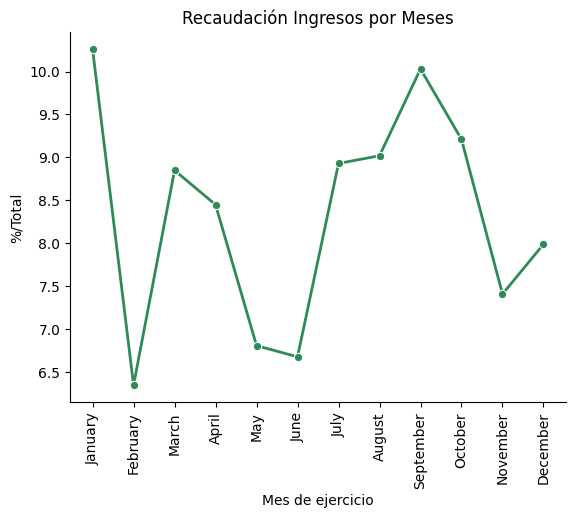

In [95]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes) sin los 3 primeros años
sns.lineplot(x = df_ingresos_mes_correcto["Mes_registro"],
              y = df_ingresos_mes_correcto["%/Total"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes_correcto["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

Ahora si podemos llegar a unos resultados más realistas. En el caso de los meses, se observa bastante más fultuación que en el caso de los años, pero también es verdad que el rango entre el que se mueven los % entre meses no es tan amplio como era en los años. En los meses el % es parecido entre todos (fluctúa entre el 6% y el 10% aprox). Es decir, no se aprecia demasiada diferencia entre lo que se recauda en un mes u otro. Parece que con el paso de los meses la recaudación no sigue una tendencia clara. Enero y octubre son los meses de mayor recaudación, con un 10,26% y 9,21% (respectivamente) sobre la recaudación total. Por el contrario, febrero, mayo y junio parecen ser los meses de menor recaudación, con el 6,35%, 6,81% y 6,68% (respectivamente) sobre la recaudación total. Las mayores fluctuaciones parecen estar entre enero y febrero, y entre junio y julio. El año comienza bien (alcanzando el máximo en enero), pero en seguida cae la recaudación en febrero (alcanzando el mínimo). Sin embargo de junio a julio ocurre lo contrario, en junio la recaudación es algo menor, y en cuestión de un mes, en julio, se eleva el porcentaje de nuevo. De enero a diciembre pasamos de un % sobre el total de la recaudación de 10,26% a 7,99%. 